In [2]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
ac

/Users/MHK/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
delta_data = pd.read_csv('full_m5delta.csv')
delta_data.set_index('Unnamed: 0',inplace=True)
del delta_data.index.name

delta_data

,delta
2012-05-30 20:05:00,0.0
2012-05-30 20:10:00,0.0
2012-05-30 20:15:00,0.0
2012-05-30 20:20:00,0.0
2012-05-30 20:25:00,0.0
2012-05-30 20:30:00,0.0
2012-05-30 20:35:00,0.0
2012-05-30 20:40:00,0.0
2012-05-30 20:45:00,0.0
2012-05-30 20:50:00,0.0


In [4]:
delta_data.index = pd.to_datetime(delta_data.index)

In [5]:
# visualize monthly data
delta_mo = delta_data.resample('MS').sum()

(60000, 150000)

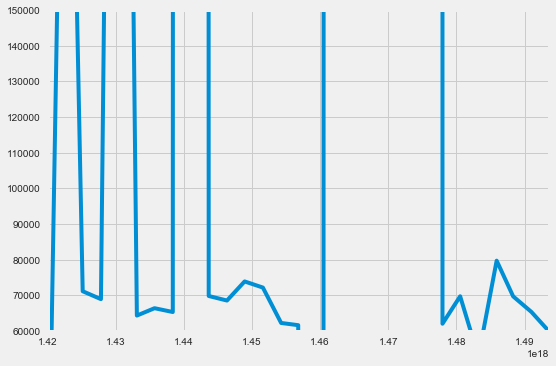

In [6]:
sns.tsplot(delta_mo.delta['2015':'2017'],delta_mo['2015':'2017'].index)
plt.ylim([60000,150000])

(1500, 2750)

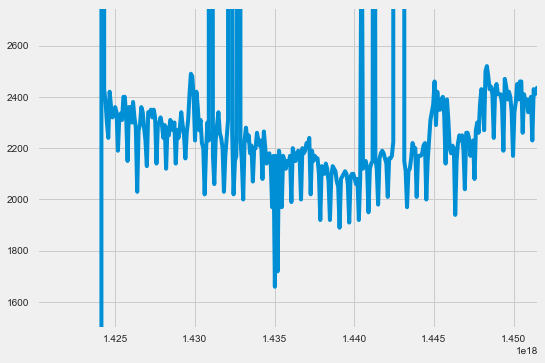

In [7]:
#visualize daily data
delta_day = delta_data.resample('D').sum()
sns.tsplot(delta_day['2015'].delta,delta_day['2015']
           .index)
plt.ylim([1500,2750])

In [8]:
delta_dayred = delta_day['2015':'2017']

###### Selecting optimal Parameters (p, d, q, P, D, Q, s) for ARIMA model

In [9]:
# use SARIMAX() function from statsmodels

In [10]:
list(itertools.product(range(0,2),range(0,2),range(0,2)))

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [11]:
# Split into training and test set

numrows = delta_dayred.shape[0]
numrows
trainrows = numrows*65/100
trainrows = int(trainrows)

deltaday_train = delta_dayred.iloc[:trainrows,:]
deltaday_test = delta_dayred.iloc[trainrows:,:]

In [12]:
deltaday_train

,delta
2015-01-01,0.000000e+00
2015-01-02,0.000000e+00
2015-01-03,0.000000e+00
2015-01-04,0.000000e+00
2015-01-05,0.000000e+00
2015-01-06,0.000000e+00
2015-01-07,0.000000e+00
2015-01-08,0.000000e+00
2015-01-09,0.000000e+00
2015-01-10,0.000000e+00


In [13]:
deltaday_test

,delta
2016-07-26,1.396117e+06
2016-07-27,1.932584e+06
2016-07-28,7.399507e+05
2016-07-29,1.890000e+03
2016-07-30,1.860000e+03
2016-07-31,1.730000e+03
2016-08-01,1.850000e+03
2016-08-02,1.860000e+03
2016-08-03,1.940000e+03
2016-08-04,2.000000e+03


In [14]:
p = d = q = range(0,2)
S = range(1)
pdq = list(itertools.product(p,d,q))

seasonal_pdq = list(itertools.product(p,d,q,S))

In [66]:
# Evaluation metric: AIC = Akaike Infromation Criterion; measures...
# ... how well model fits data - higher the AIC, better the params

warnings.filterwarnings('ignore')

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(deltaday_train,
                                           order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationary = False,
                                           enforce_invertibility=False)
            results = mod.fit()
            
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 0) - AIC:17031.122185087843
ARIMA(0, 0, 0)x(1, 0, 0, 0) - AIC:16868.367946491777
ARIMA(0, 0, 0)x(1, 0, 1, 0) - AIC:16841.03140079236
ARIMA(0, 0, 1)x(0, 0, 0, 0) - AIC:17031.122185087843
ARIMA(0, 0, 1)x(0, 0, 1, 0) - AIC:17009.778667958257
ARIMA(0, 0, 1)x(1, 0, 0, 0) - AIC:16909.559858911274
ARIMA(0, 0, 1)x(1, 0, 1, 0) - AIC:16911.184322867754
ARIMA(0, 1, 0)x(0, 0, 1, 0) - AIC:16849.5836115309
ARIMA(0, 1, 0)x(1, 0, 0, 0) - AIC:16865.774964511154
ARIMA(0, 1, 0)x(1, 0, 1, 0) - AIC:16850.461466891044
ARIMA(0, 1, 1)x(0, 0, 0, 0) - AIC:16849.5836115309
ARIMA(0, 1, 1)x(0, 0, 1, 0) - AIC:16854.42647225803
ARIMA(0, 1, 1)x(1, 0, 0, 0) - AIC:16850.462283077683
ARIMA(0, 1, 1)x(1, 0, 1, 0) - AIC:16817.842080726245
ARIMA(1, 0, 0)x(0, 0, 0, 0) - AIC:16868.367946491777
ARIMA(1, 0, 0)x(0, 0, 1, 0) - AIC:16841.817804375754
ARIMA(1, 0, 0)x(1, 0, 0, 0) - AIC:16913.69011134726
ARIMA(1, 0, 0)x(1, 0, 1, 0) - AIC:16870.114768663138
ARIMA(1, 0, 1)x(0, 0, 0, 0) - AIC:16841.03140079236
A

In [68]:
type(deltaday_train.index[0])

pandas._libs.tslib.Timestamp

In [16]:
# min AIC for ARIMA(0, 1, 1)x(1, 0, 1, 0) - AIC:16817.842080726245

mod = sm.tsa.statespace.SARIMAX(deltaday_train,
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 1, 1),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2973      0.017    -17.322      0.000      -0.331      -0.264
ar.S.L1        0.8179      0.015     52.932      0.000       0.788       0.848
ma.S.L1       -1.0159      0.004   -248.812      0.000      -1.024      -1.008
sigma2      3.841e+11   6.47e-14   5.94e+24      0.000    3.84e+11    3.84e+11


In [17]:
results

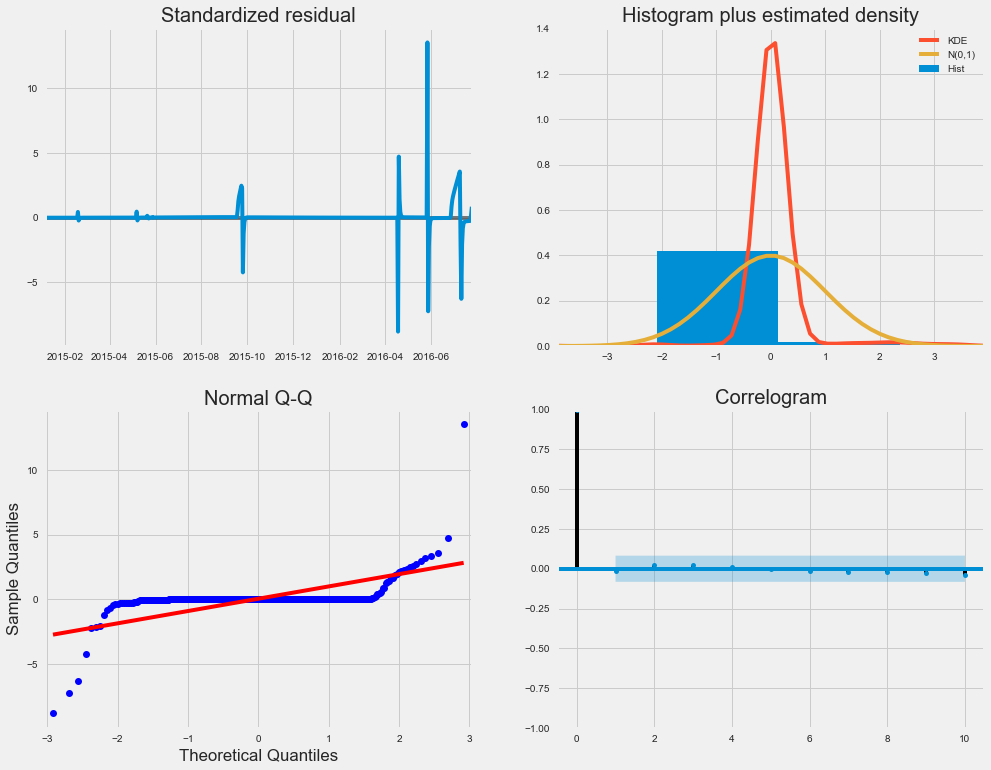

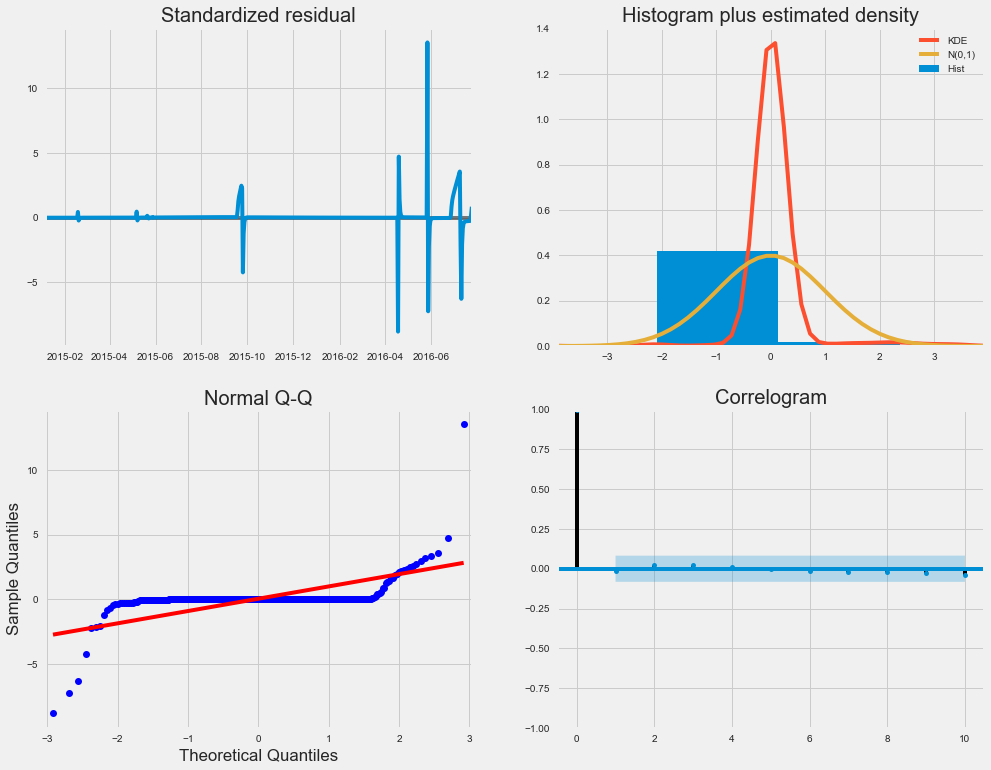

In [18]:
results.plot_diagnostics(figsize=(15, 12))


In [19]:
# the residuals are not normally distributed - bars don't follow the KDE line
# Good that there is no correlation (from autocorrelation chart)
# We don't have a good model, but it could do - change params to make a better fit. 

In [20]:
time = (deltaday_train.index[-20]).date()
time


datetime.date(2016, 7, 6)

In [21]:
# Verifying Forecasts

pred = results.get_prediction(start = '2016-01-01', dynamic = False,full_results=True)

In [22]:
pred_ci = pred.conf_int()

In [23]:
pred_ci

,lower delta,upper delta
2016-01-01,-1.237496e+06,1.229572e+06
2016-01-02,-1.237408e+06,1.229691e+06
2016-01-03,-1.237338e+06,1.229791e+06
2016-01-04,-1.237333e+06,1.229826e+06
2016-01-05,-1.237170e+06,1.230017e+06
2016-01-06,-1.237053e+06,1.230162e+06
2016-01-07,-1.236981e+06,1.230261e+06
2016-01-08,-1.236907e+06,1.230361e+06
2016-01-09,-1.236839e+06,1.230454e+06
2016-01-10,-1.236800e+06,1.230518e+06


In [24]:
deltaday_test.index = pd.to_datetime(deltaday_test.index, format = '%Y-%m-%d')
deltaday_train.index = pd.to_datetime(deltaday_train.index, format = '%Y-%m-%d')

In [25]:
# have to use existing data only - cannot predict based on new timestamps!

(-10000, 10000)

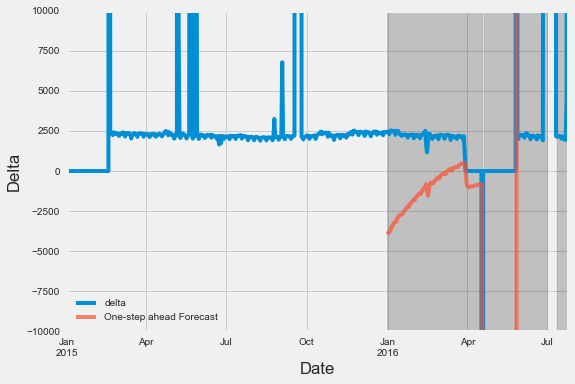

In [26]:
ax = deltaday_train['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Delta')
plt.legend()
plt.ylim(-10000,10000)

In [27]:
delta_dayred

,delta
2015-01-01,0.0
2015-01-02,0.0
2015-01-03,0.0
2015-01-04,0.0
2015-01-05,0.0
2015-01-06,0.0
2015-01-07,0.0
2015-01-08,0.0
2015-01-09,0.0
2015-01-10,0.0


(0, 3500)

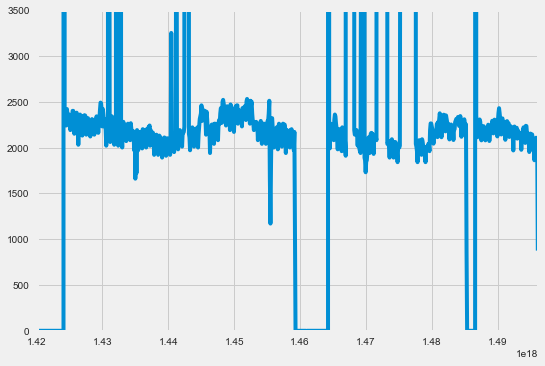

In [28]:
# visualize delta_dayred to evaluate whether stationary or non-stationary

delta_dayred
sns.tsplot(delta_dayred.delta,delta_dayred.index)
plt.ylim([0,3500])

In [29]:
# delta_dayred is clearly non-stationary, as you can see seasonality. Weekly seasonality as well as annual seasonality...
# ... every year, values drop around summer-time, and then pick up again during the school year. 

In [30]:
# second order differencing of delta_dayred data to see if it will remove trend and seasonality
# use np.arrays for slicing benefits to create second difference list

ts = np.array(delta_dayred.index[1:]) #just ts list that will be needed for second diff index
values = np.array(delta_dayred.delta)
secdiff = values[1:]-values[:-1]

In [31]:
# create dataframe of second difference np.array

delta_dayredsec = pd.DataFrame(secdiff)
delta_dayredsec = delta_dayredsec.rename(columns={0:'deltasec'})

delta_dayredsec.index = ts

(-300, 300)

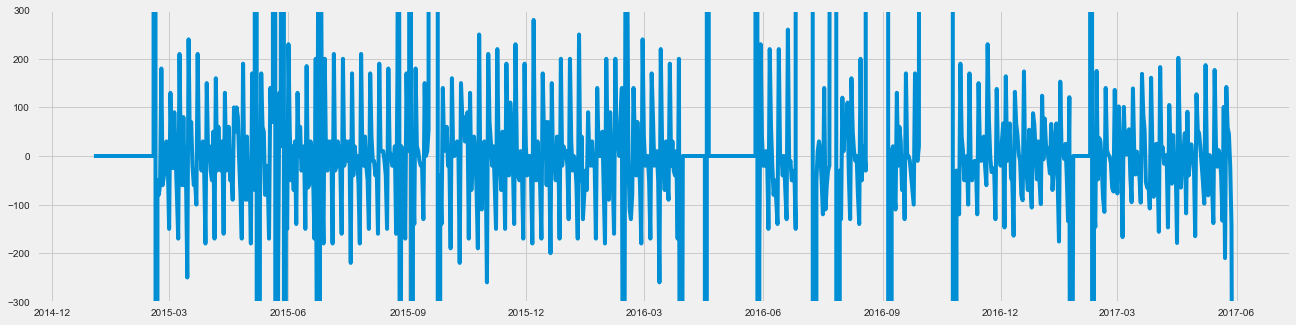

In [32]:
plt.figure(figsize=(20,5))
plt.plot(delta_dayredsec.index, delta_dayredsec.deltasec)
plt.ylim([-300,300])

In [33]:
#plot seems to be more stationary now!
# do acf plot to double check. 
print(delta_dayredsec.shape)

(879, 1)


(-0.1, 0.1)

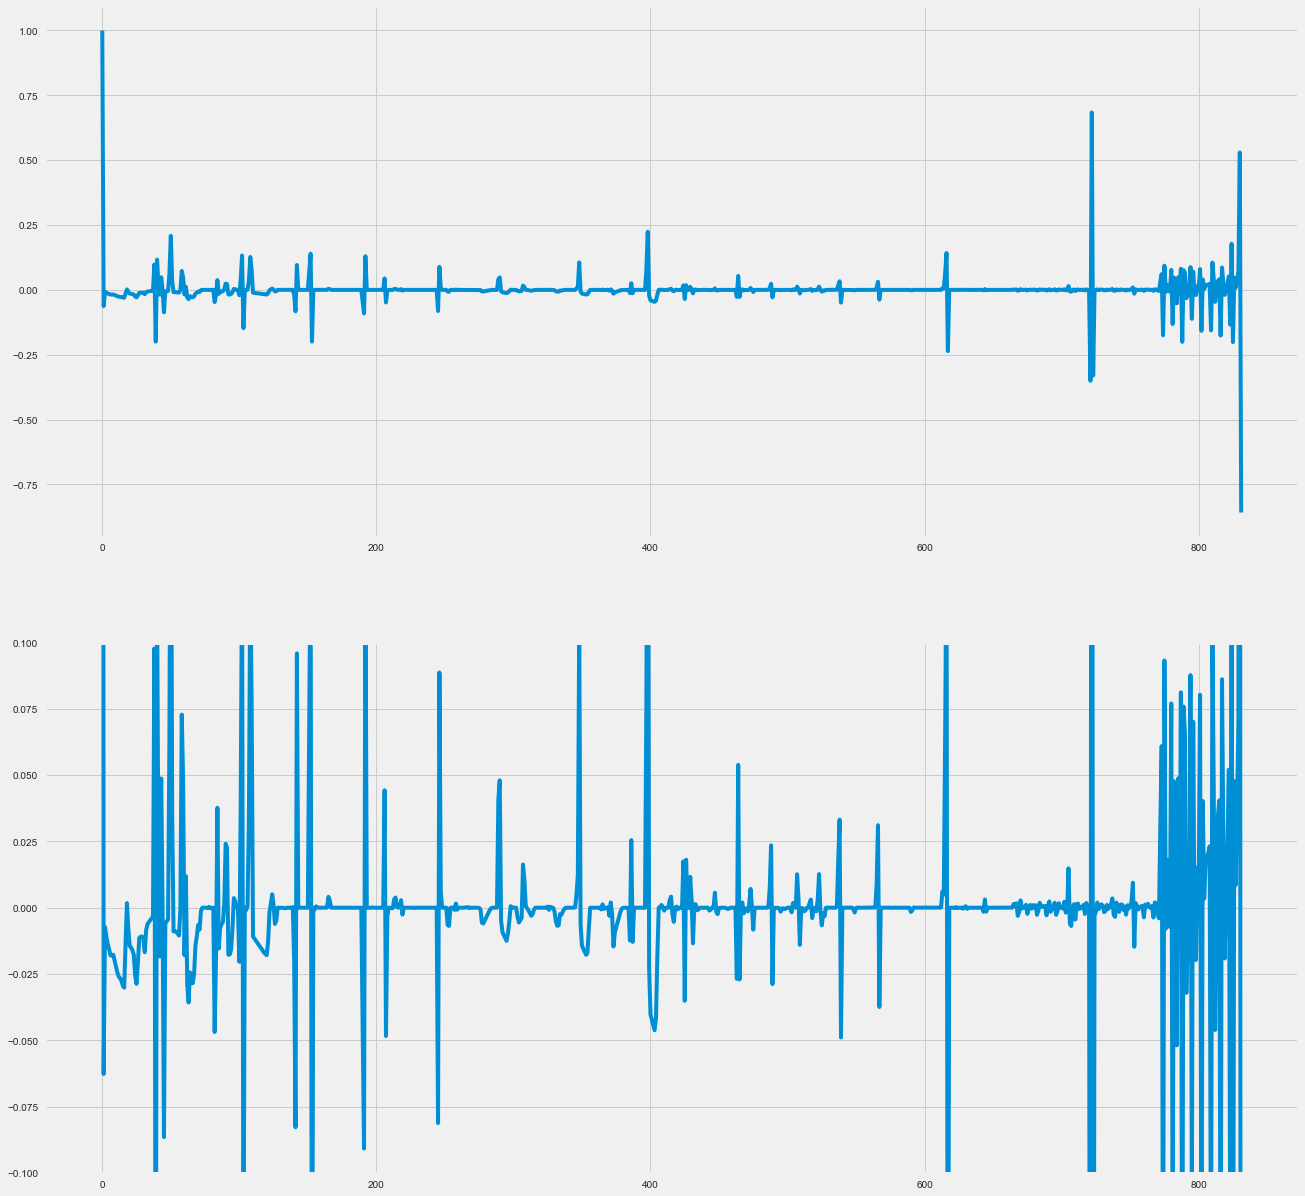

In [34]:
autocorr_list = [delta_dayredsec.deltasec.autocorr(lag=x) for x in range(879)]

plt.figure(figsize=(20,20))

plt.subplot(2,1,1)
plt.plot(autocorr_list)
# plt.xlabel('lag')
# plt.ylabel('R value')
# plt.title('Autocorrelation plot for delta_dayredsec')

plt.subplot(2,1,2)
plt.plot(autocorr_list)
# plt.xlabel('lag')
# plt.ylabel('R value')
# plt.title('Autocorrelation plot for delta_dayredsec')
plt.ylim([-0.1,0.1])


In [35]:
# autocorr graph shows that it does not drop to values close to zero quickly, but then increases at the end..
# ... therefore need to apply seasonality differencing to make stationary

###### Following ARIMA modelling procedure in otexts 8.6 onwards

In [36]:
# Autocorr plot for delta values' first difference is not convincing enough since it has huge spikes at the end. 

In [37]:
from statsmodels.tsa.stattools import acf,pacf

In [38]:
help(acf)

Help on function acf in module statsmodels.tsa.stattools:

acf(x, unbiased=False, nlags=40, qstat=False, fft=False, alpha=None, missing='none')
    Autocorrelation function for 1d arrays.
    
    Parameters
    ----------
    x : array
       Time series data
    unbiased : bool
       If True, then denominators for autocovariance are n-k, otherwise n
    nlags: int, optional
        Number of lags to return autocorrelation for.
    qstat : bool, optional
        If True, returns the Ljung-Box q statistic for each autocorrelation
        coefficient.  See q_stat for more information.
    fft : bool, optional
        If True, computes the ACF via FFT.
    alpha : scalar, optional
        If a number is given, the confidence intervals for the given level are
        returned. For instance if alpha=.05, 95 % confidence intervals are
        returned where the standard deviation is computed according to
        Bartlett's formula.
    missing : str, optional
        A string in ['none', '

In [39]:
help(pacf)

Help on function pacf in module statsmodels.tsa.stattools:

pacf(x, nlags=40, method='ywunbiased', alpha=None)
    Partial autocorrelation estimated
    
    Parameters
    ----------
    x : 1d array
        observations of time series for which pacf is calculated
    nlags : int
        largest lag for which pacf is returned
    method : 'ywunbiased' (default) or 'ywmle' or 'ols'
        specifies which method for the calculations to use:
    
        - yw or ywunbiased : yule walker with bias correction in denominator
          for acovf
        - ywm or ywmle : yule walker without bias correction
        - ols - regression of time series on lags of it and on constant
        - ld or ldunbiased : Levinson-Durbin recursion with bias correction
        - ldb or ldbiased : Levinson-Durbin recursion without bias correction
    
    alpha : scalar, optional
        If a number is given, the confidence intervals for the given level are
        returned. For instance if alpha=.05, 95 % con

In [40]:
# function definition to create acf and pacf plots for dataset provided

def plot_acfpacf (data, upper):
    # data will be used to find acf and pacf values based on lower and upper bound of lags
    dictdf = acfpacf(data,upper)
    plt.figure(figsize=[20,20])
    plt.subplot(2,1,1)
    plt.plot(dictdf[0].index,dictdf[0].acf)
    plt.ylabel = 'acf'
    plt.xlabel = 'lag'

    plt.subplot(2,1,2)
#     plt.ylim=[-1,1]
    plt.plot(dictdf[1].index,dictdf[1].pacf)
#     plt.ylabel = 'pacf'
#     plt.xlabel = 'lag'
    
def acfpacf(series,up):
    dictdf = {}
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    df1['acf'] = acf(series,nlags=up)
    df2['pacf'] = pacf(series,nlags=up)
    dictdf[0]=df1
    dictdf[1]=df2
    return dictdf

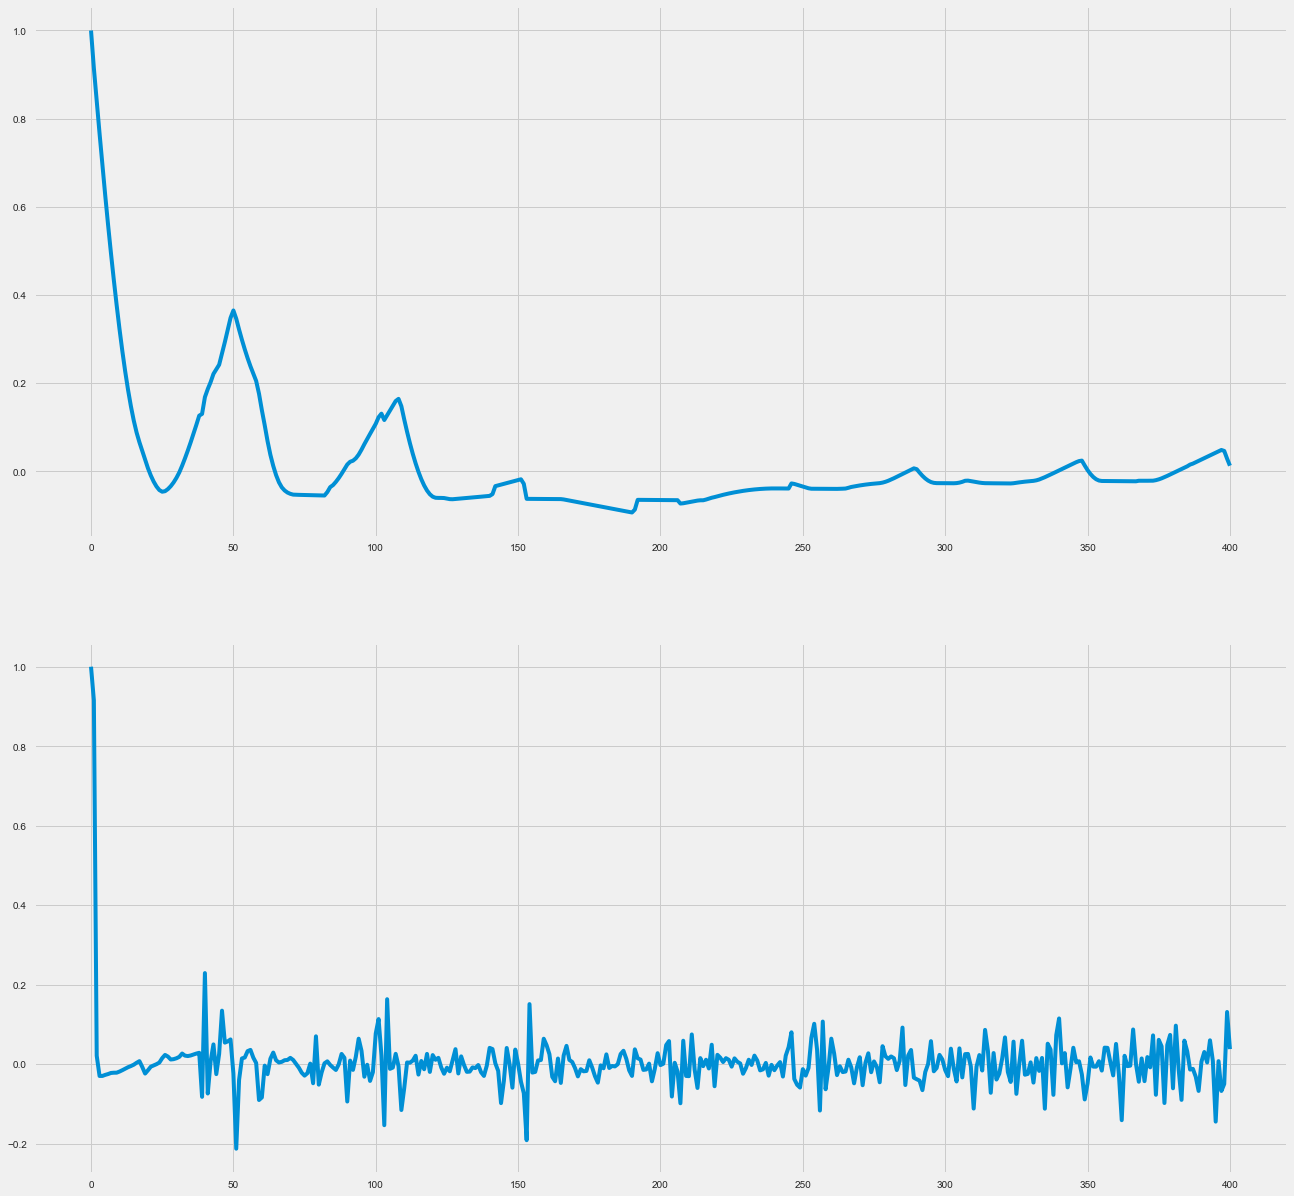

In [41]:
plot_acfpacf(delta_dayred.delta,400)

In [42]:
# because acf doesn't drop to 0 quickly, but rather oscillates, it is non-stationary, ...
# therefore, try and do a second second difference or do a seasnal difference. 

(-10, 10)

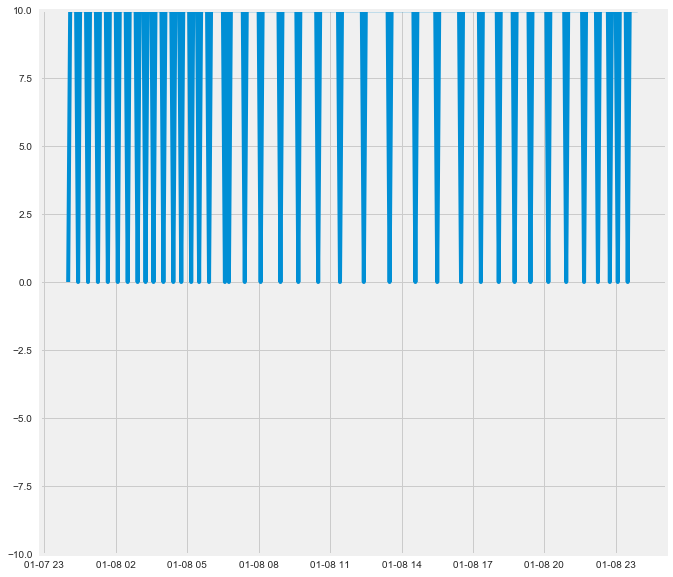

In [43]:
# checking if should use finer granularity of delta data at all. 
# so that there are more data points and a more accurate model

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=([10,10]))
plt.plot(delta_data['2016-01-08'].index,delta_data['2016-01-08'].delta)
plt.ylim([-10,10])

# try hourly granularity

(0, 200)

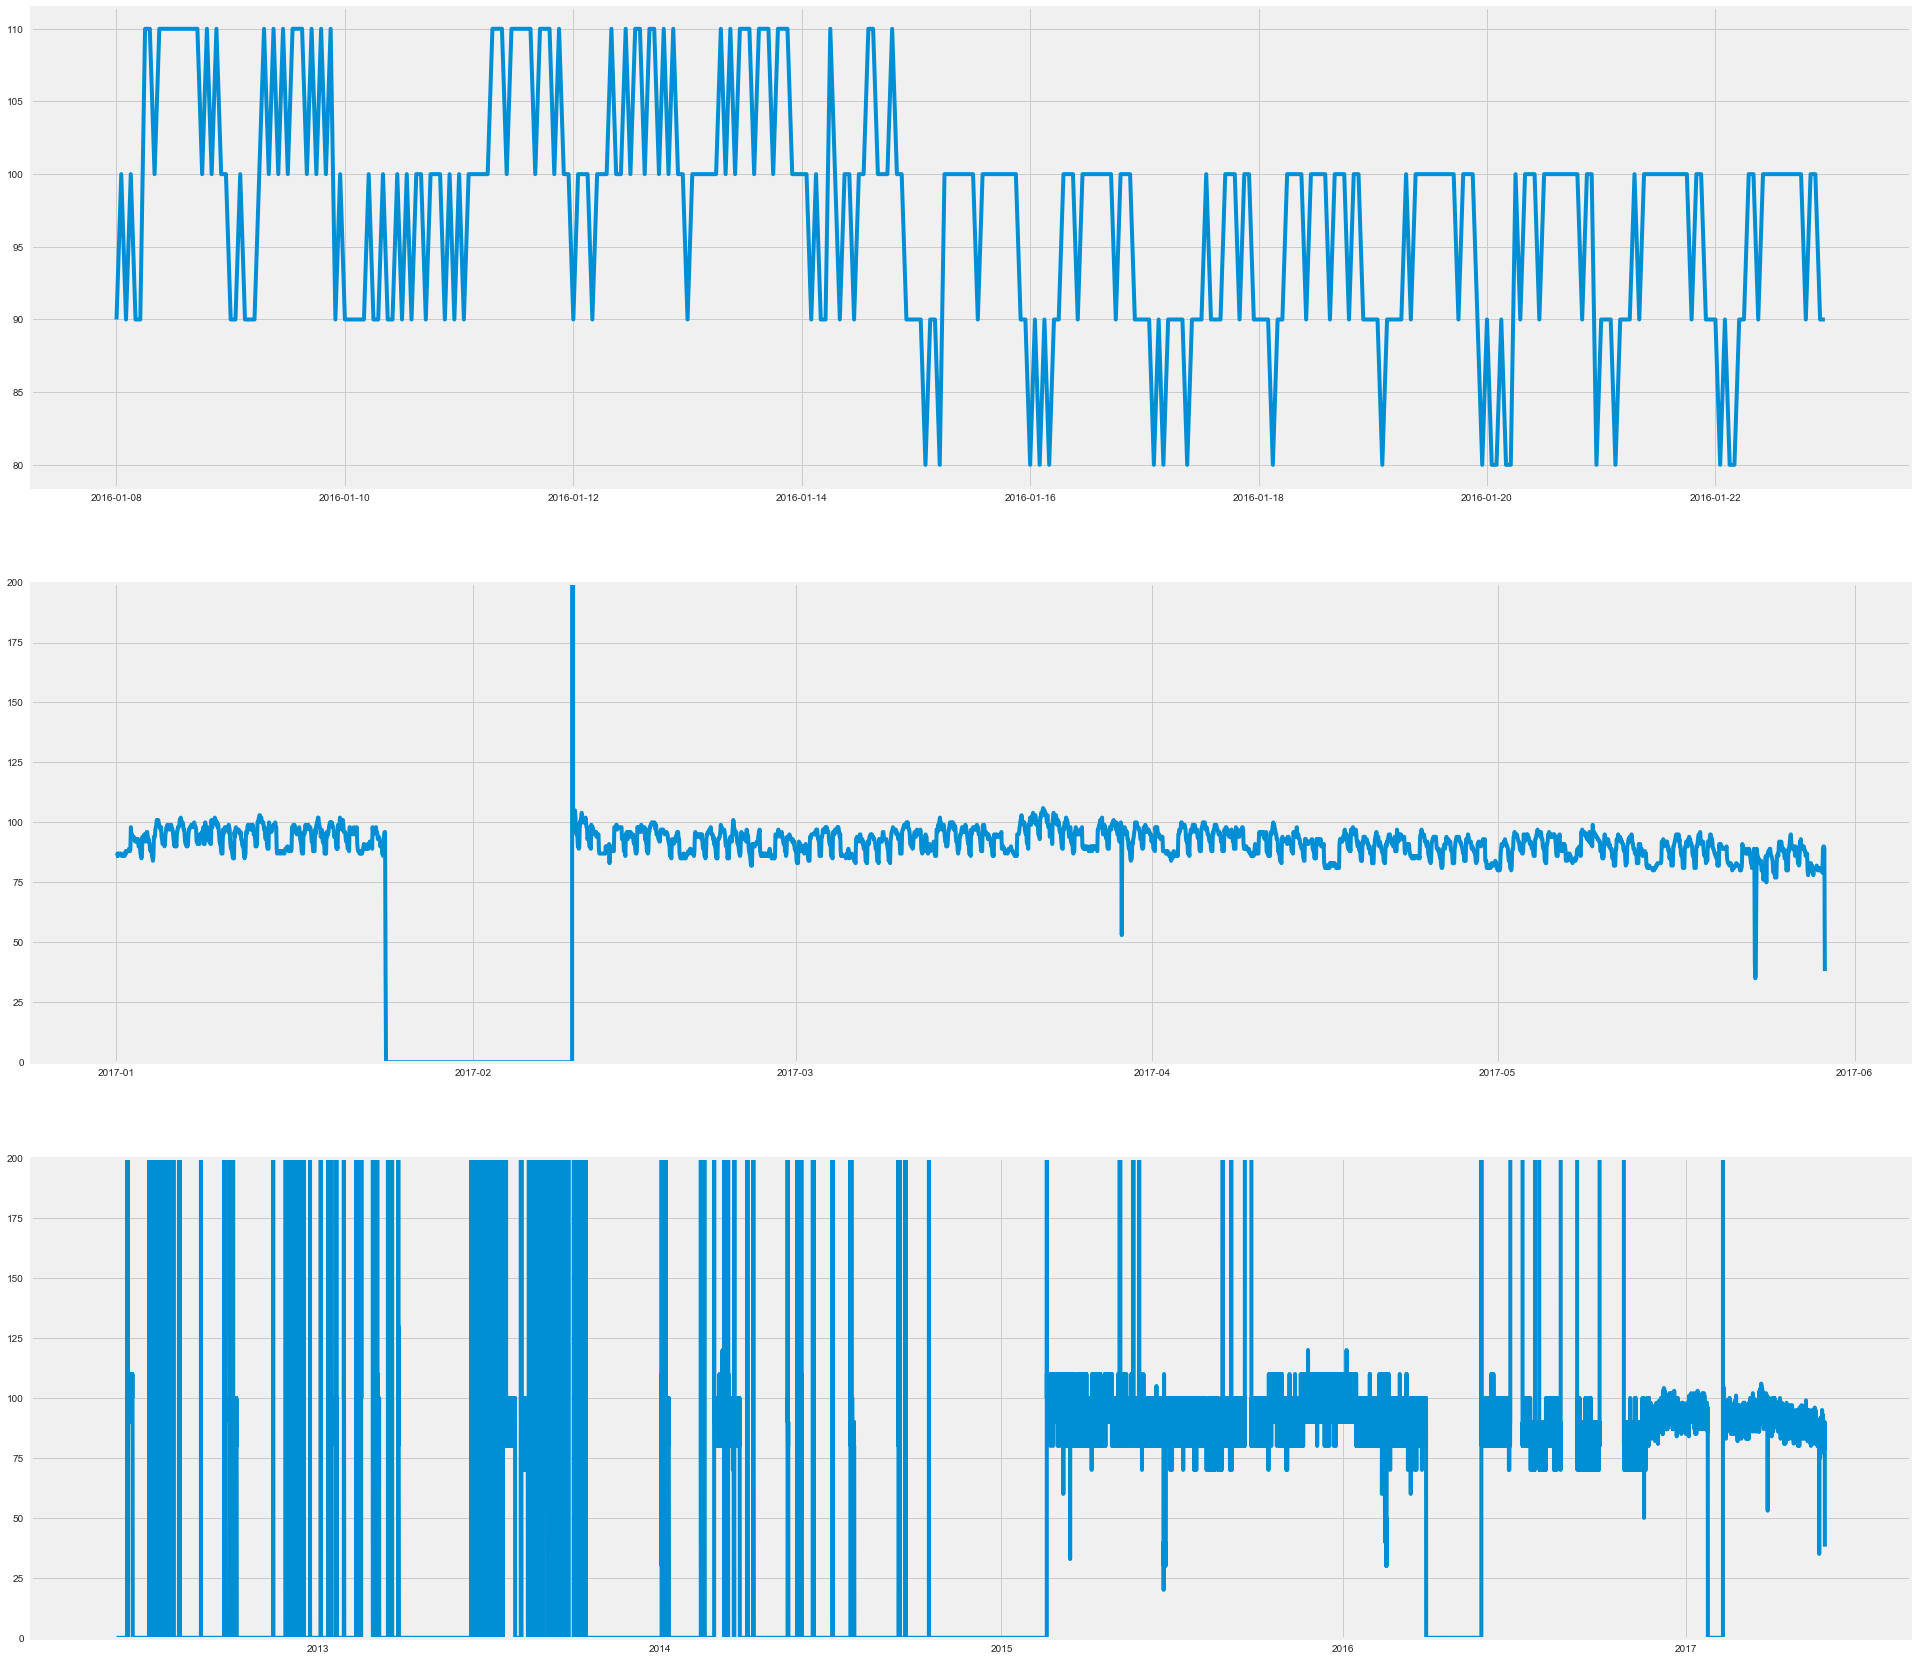

In [44]:
# check hourly granularity for data to see if it can be used instead...
# of daily data, so that there are more data points 
delta_hour = delta_data.resample('H').sum()

plt.figure(figsize=(30,30))
plt.subplot(3,1,1)
plt.plot(delta_hour['2016-01-08':'2016-01-22'].index,delta_hour['2016-01-08':'2016-01-22'].delta)
plt.subplot(3,1,2)
plt.plot(delta_hour['2017'].index,delta_hour['2017'].delta)
plt.ylim([0,200])
plt.subplot(3,1,3)
plt.plot(delta_hour.index,delta_hour.delta)

plt.ylim([0,200])

(-10, 200)

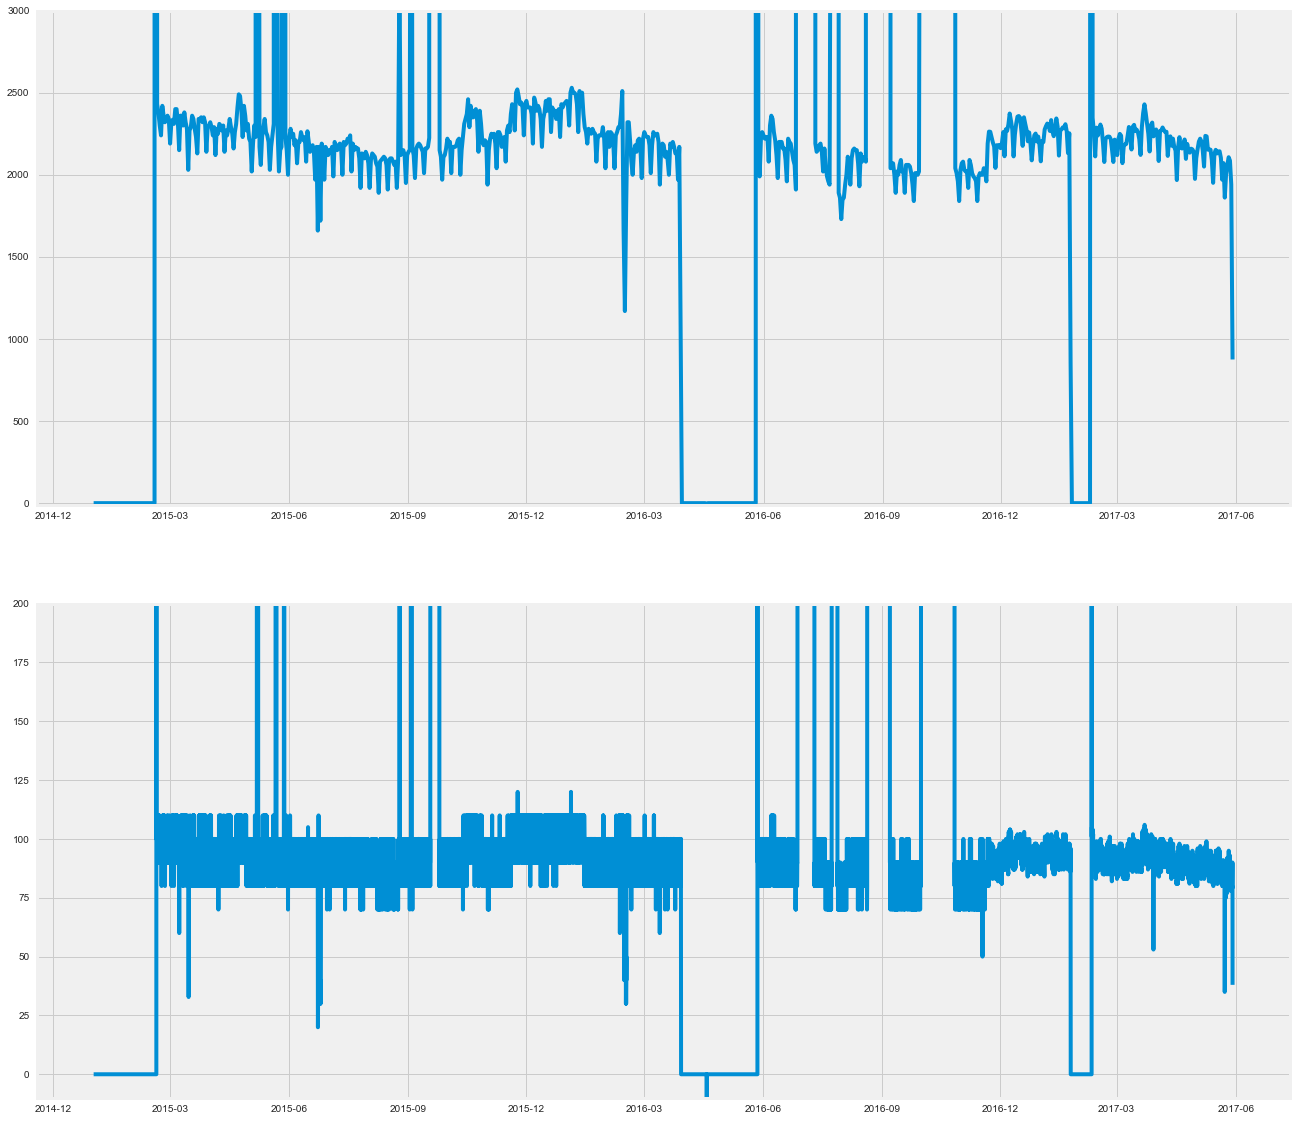

In [45]:
# comparing hourly data and daily data from 2015 onwards

plt.figure(figsize=[20,20])

plt.subplot(2,1,1)
plt.plot(delta_dayred.index,delta_dayred.delta)
plt.ylim([-10,3000])

plt.subplot(2,1,2)
plt.plot(delta_hour['2015':].index,delta_hour['2015':])
plt.ylim([-10,200])


In [46]:
# Hourly data shows seasonality during a given day, and it reproduces quite..
# .. often; only thing is that it has many gaps in data as well that are 
# filled with abnormal data. But so does daily data. Therefore, use hourly data from now onwards

In [47]:
# making hourly data stationary 

# first method: use seasonal difference - seasons are 24 hours wide, and then they repeat. 

deltahr_red = delta_hour['2015':]

# create arrays by slicing to get seasonal differences in df deltahr_seas
to_add = np.array(list(deltahr_red.iloc[24:].delta))
to_subtract = np.array(list(deltahr_red.iloc[:-24].delta))
seas_diff = to_add-to_subtract
deltahr_seas = pd.DataFrame(seas_diff)
deltahr_seas.index = deltahr_red.iloc[24:].index
deltahr_seas.rename(columns = {0:'delta'},inplace=True)

(-100, 100)

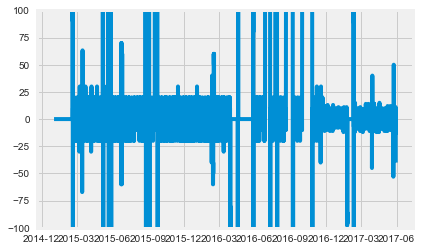

In [48]:
# plot the seasonal differenced data to see if stationary, together with its acf and pacf

plt.plot(deltahr_seas.index,deltahr_seas.delta)
plt.ylim([-100,100])

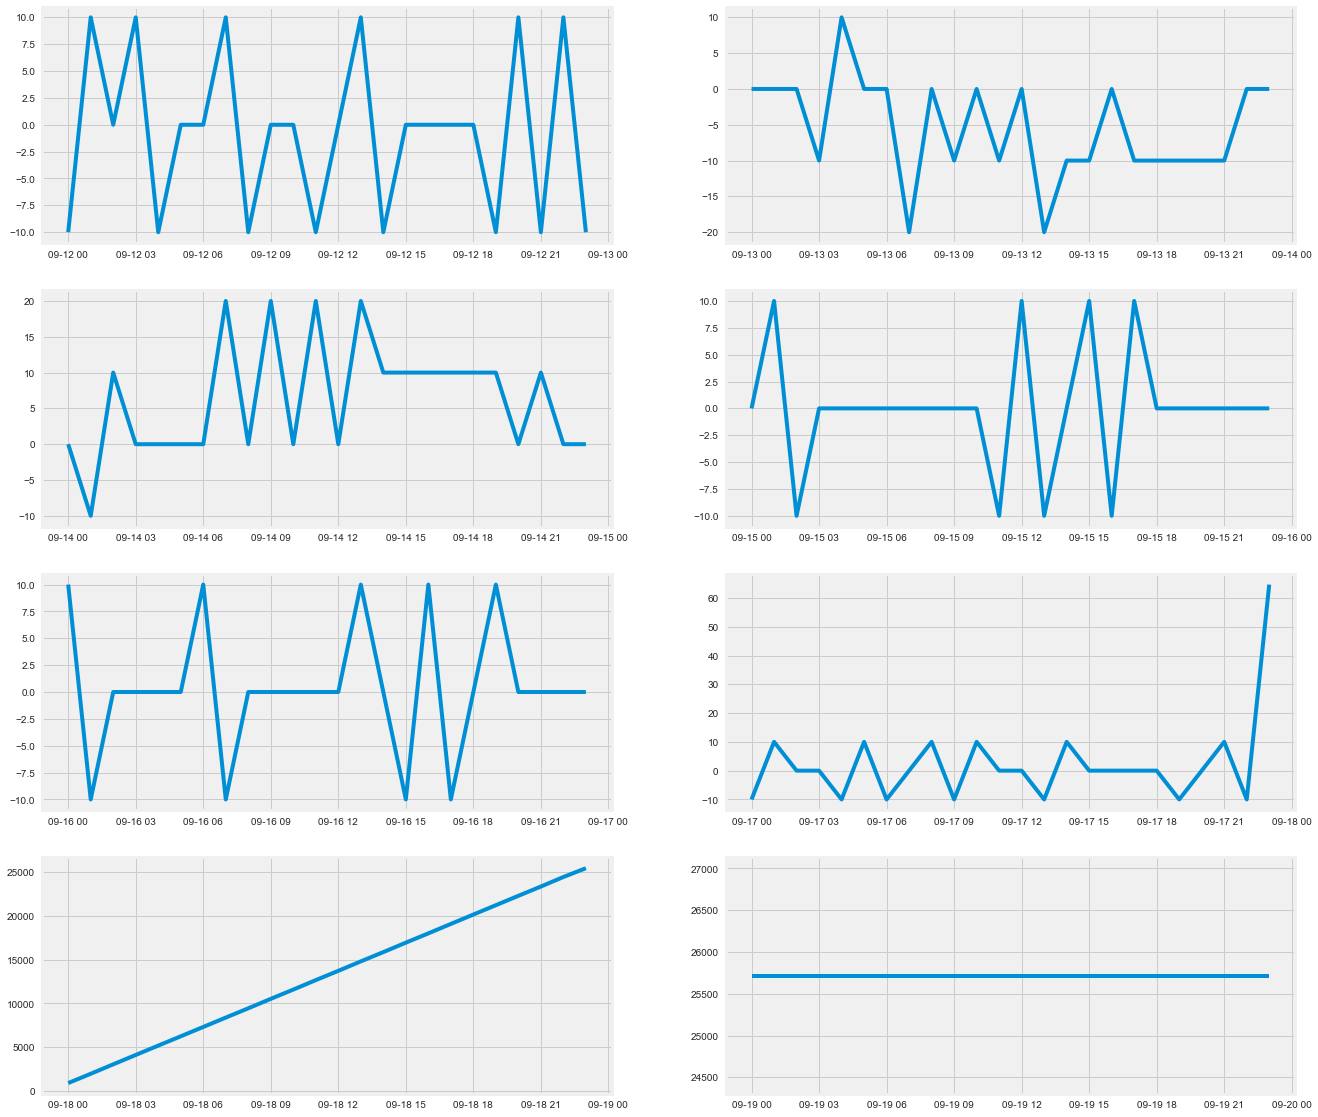

In [49]:
# Checking if seasonal difference has seasonality still
# And if the data requires a Seasonal ARIMA or not. 

plt.figure(figsize=[20,20])
plt.subplot(4,2,1)
plt.plot(deltahr_seas['2015-09-12'].index,deltahr_seas['2015-09-12'].delta)
plt.subplot(4,2,2)
plt.plot(deltahr_seas['2015-09-13'].index,deltahr_seas['2015-09-13'].delta)
plt.subplot(4,2,3)
plt.plot(deltahr_seas['2015-09-14'].index,deltahr_seas['2015-09-14'].delta)
plt.subplot(4,2,4)
plt.plot(deltahr_seas['2015-09-15'].index,deltahr_seas['2015-09-15'].delta)
plt.subplot(4,2,5)
plt.plot(deltahr_seas['2015-09-16'].index,deltahr_seas['2015-09-16'].delta)
plt.subplot(4,2,6)
plt.plot(deltahr_seas['2015-09-17'].index,deltahr_seas['2015-09-17'].delta)
plt.subplot(4,2,7)
plt.plot(deltahr_seas['2015-09-18'].index,deltahr_seas['2015-09-18'].delta)
plt.subplot(4,2,8)
plt.plot(deltahr_seas['2015-09-19'].index,deltahr_seas['2015-09-19'].delta)

In [50]:
deltahr_seas.shape

(21083, 1)

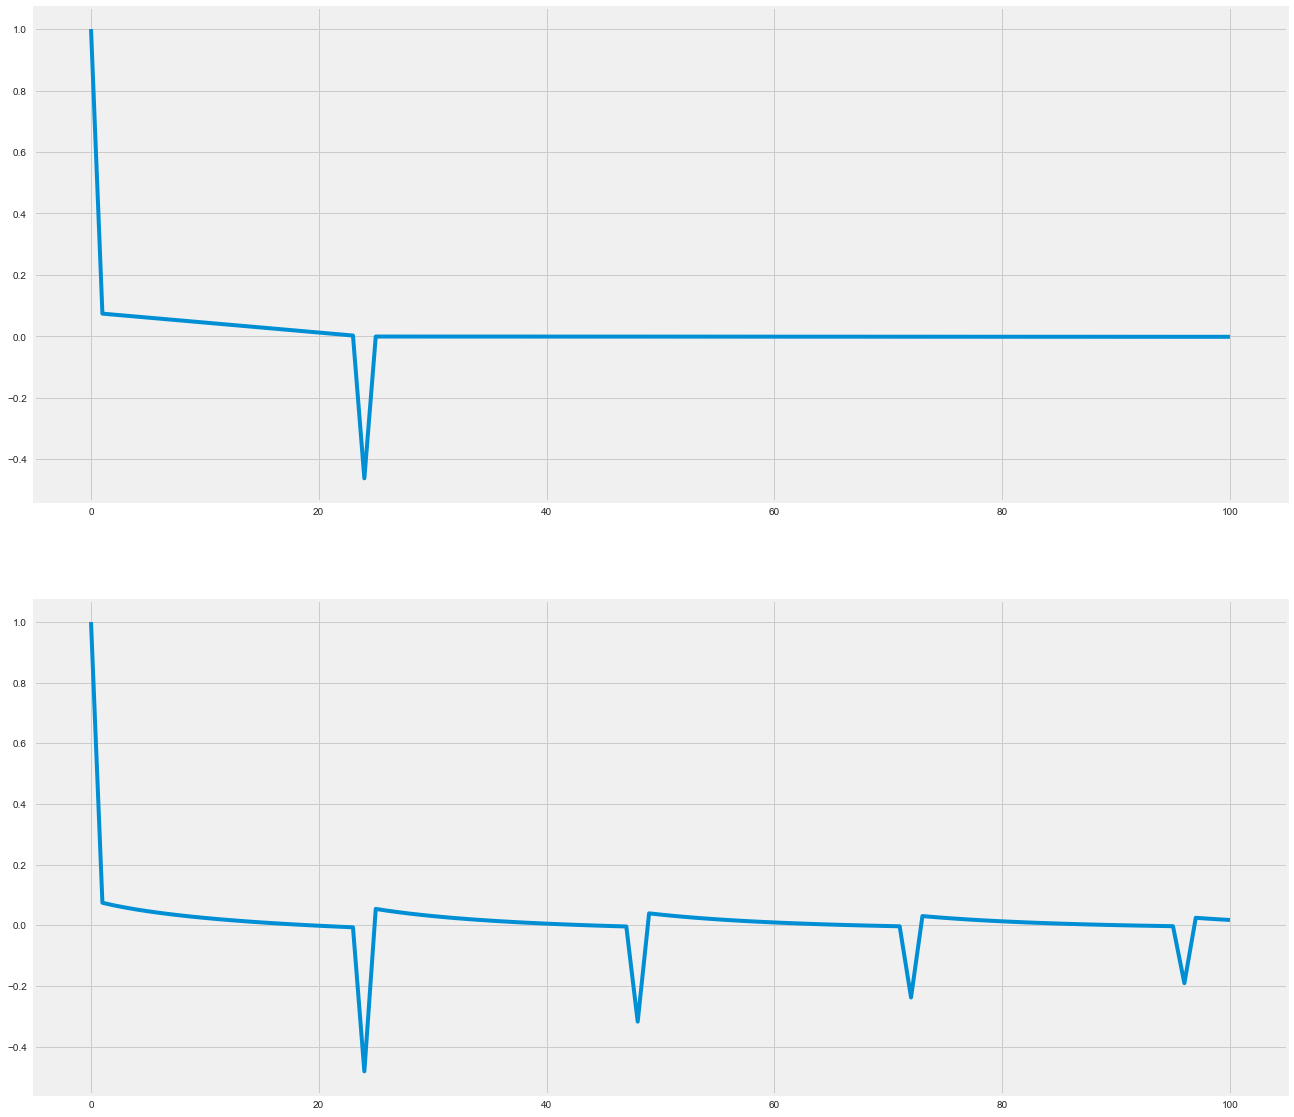

In [51]:
plot_acfpacf(deltahr_seas.delta,100)

In [52]:
# plotting the seasonal differentiated values shows no observable trend...
# ... or seasonality, and acf drops to 0 relatively quickly. This means...
# ... that the data is now stationary

In [53]:
# Augmented Dickey-Fuller test (a type of unit root test) to ...
# ... check if statistically the time series is stationary

from statsmodels.tsa.stattools import adfuller
deltahr_seas_only = pd.Series(deltahr_seas.delta)
values_only = deltahr_seas_only.values
result = adfuller(values_only)

print('ADF Statistic: ',result[0])
print('p-value: ',result[1])
print('p-value and ADF Stat key values:\n',result[4])

ADF Statistic:  -22.3035745999
p-value:  0.0
p-value and ADF Stat key values:
 {'1%': -3.4306607525309119, '5%': -2.8616773420730195, '10%': -2.566843103367364}


In [54]:
# since p-value from adf test is so small that it is essentially 0 ...
# and since ADF Statistic is such a large negative number...
# it can be safely said that the seasonal-differenced hourly data ...
# is stationary!

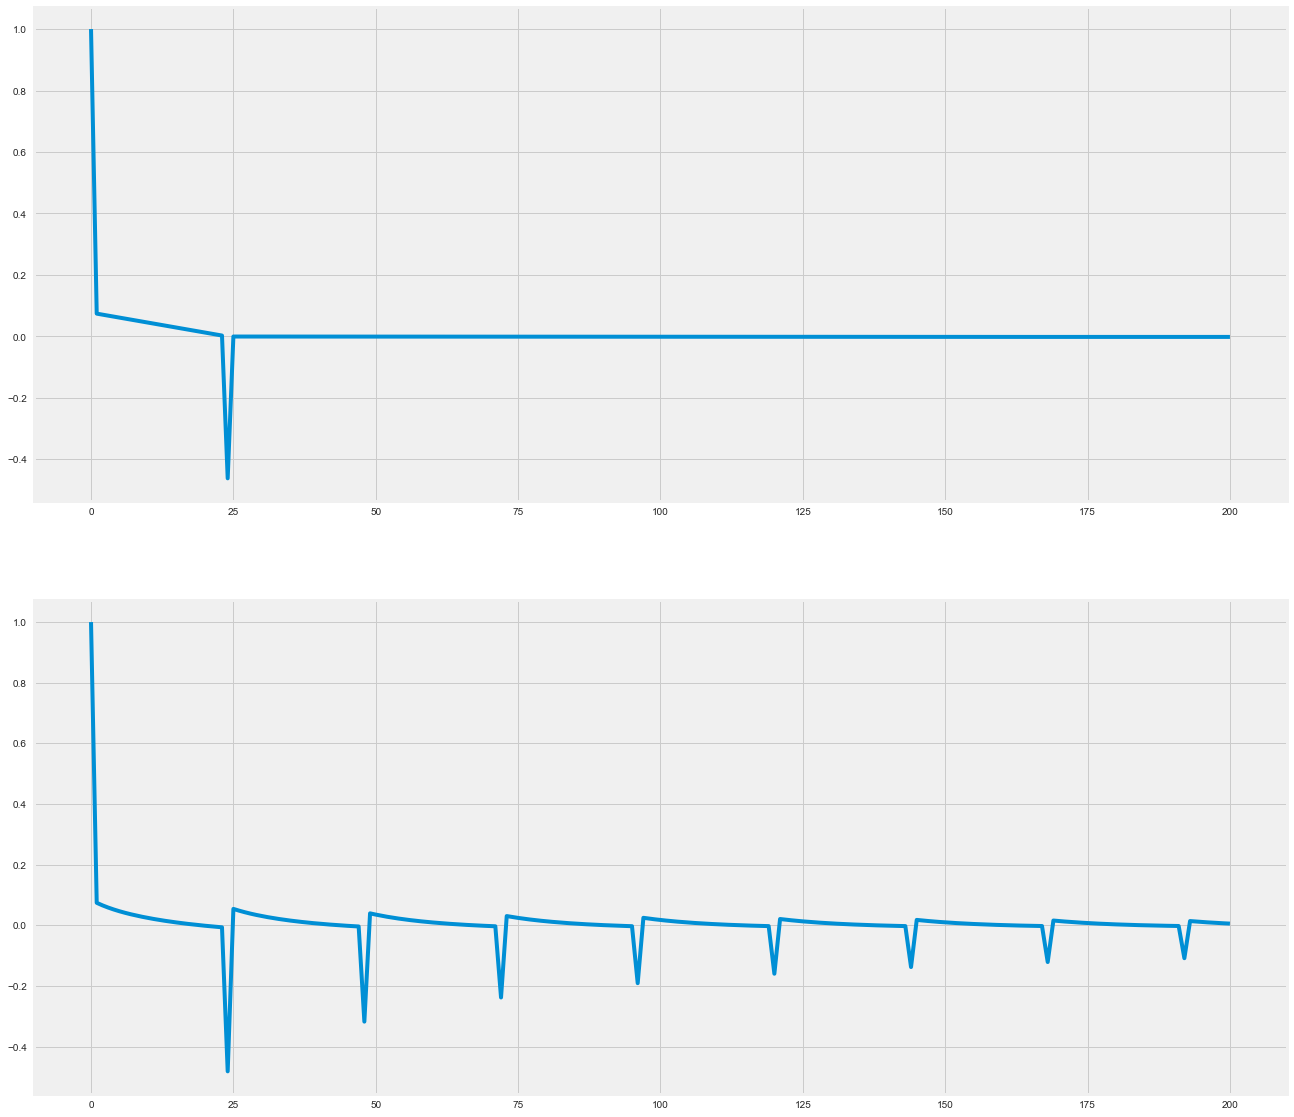

In [55]:
# plotting acf and pacf of differenced data to try and determing...
# possible candidate ARIMA models

plot_acfpacf(deltahr_seas.delta,200)

In [56]:
# cont.. see if can use acfpacf plot for determining p and q vals
# then follow otext tut. 

In [57]:
# selecting parameters for ARIMA model - p =0, q =24 since the...
# acf plot exponentially decreases, except for one spike at lag 24

# Now try different parameters around 0,1,24 and testing how...
# effective the model is, using AIC test statistic. 



In [58]:
# Realized that although seasonal data is made stationary, ...
# .. seasonal ARIMA still needed!
# Model required is pure SMA model - seasonal ARIMA with only D and Q parameters. S = 24 since that
# ... is the lag period of one season. 

###### Using SARIMAX to model

In [59]:
# split data into train, cv and test; 25% into test, 30% of remaining = cv

deltaseas_train = deltahr_seas.iloc[:15812]
deltaseas_test = deltahr_seas.iloc[15812:]
deltaseas_cv = deltaseas_train.iloc[11068:]
deltaseas_train = deltaseas_train.iloc[:11068]

In [60]:
deltaseas_train

,delta
2015-01-02 00:00:00,0.0
2015-01-02 01:00:00,0.0
2015-01-02 02:00:00,0.0
2015-01-02 03:00:00,0.0
2015-01-02 04:00:00,0.0
2015-01-02 05:00:00,0.0
2015-01-02 06:00:00,0.0
2015-01-02 07:00:00,0.0
2015-01-02 08:00:00,0.0
2015-01-02 09:00:00,0.0


In [61]:
deltaseas_cv

,delta
2016-04-07 04:00:00,0.000000
2016-04-07 05:00:00,0.000000
2016-04-07 06:00:00,0.000000
2016-04-07 07:00:00,0.000000
2016-04-07 08:00:00,0.000000
2016-04-07 09:00:00,0.000000
2016-04-07 10:00:00,0.000000
2016-04-07 11:00:00,0.000000
2016-04-07 12:00:00,0.000000
2016-04-07 13:00:00,0.000000


In [62]:
deltaseas_test

,delta
2016-10-21 20:00:00,24172.506044
2016-10-21 21:00:00,24172.506044
2016-10-21 22:00:00,24172.506044
2016-10-21 23:00:00,24172.506044
2016-10-22 00:00:00,24172.506044
2016-10-22 01:00:00,24172.506044
2016-10-22 02:00:00,24172.506044
2016-10-22 03:00:00,24172.506044
2016-10-22 04:00:00,24172.506044
2016-10-22 05:00:00,24172.506044


In [63]:
list(range(2))

[0, 1]

In [63]:
p = q = range(1)
d = range(1) # no non-seasonal difference was done
P = range(1)
Q = range(24,25)
D = range(1,2) # because only 1 seasonal difference was done
S = range(24,25) # season lasts 1 day

pdq = list(itertools.product(p,d,q))
seasonalpdq = list(itertools.product(P,D,Q,S))

In [64]:
deltaseas_train.to_csv('deltaseas_train')
deltaseas_cv.to_csv('deltaseas_cv')
deltaseas_test.to_csv('deltaseas_test')